In [1]:
## 多种回归方法完成面部补全
## 来源：https://scikit-learn.org/stable/auto_examples/miscellaneous/plot_multioutput_face_completion.html#sphx-glr-auto-examples-miscellaneous-plot-multioutput-face-completion-py
## 参考：https://github.com/scikit-learn/scikit-learn/blob/3f89022fa/sklearn/datasets/_olivetti_faces.py#L37

import logging

import matplotlib.pyplot as plt
from numpy.random import RandomState

from sklearn import cluster, decomposition
from sklearn.datasets import fetch_olivetti_faces


In [2]:

rng = RandomState(0)
print(rng)
# Display progress logs on stdout
logging.basicConfig(level=logging.INFO, format="%(asctime)s %(levelname)s %(message)s")


RandomState(MT19937)


In [4]:
help(fetch_olivetti_faces)

Help on function fetch_olivetti_faces in module sklearn.datasets._olivetti_faces:

fetch_olivetti_faces(*, data_home=None, shuffle=False, random_state=0, download_if_missing=True, return_X_y=False)
    Load the Olivetti faces data-set from AT&T (classification).
    
    Download it if necessary.
    
    =================   =====================
    Classes                                40
    Samples total                         400
    Dimensionality                       4096
    Features            real, between 0 and 1
    =================   =====================
    
    Read more in the :ref:`User Guide <olivetti_faces_dataset>`.
    
    Parameters
    ----------
    data_home : str, default=None
        Specify another download and cache folder for the datasets. By default
        all scikit-learn data is stored in '~/scikit_learn_data' subfolders.
    
    shuffle : bool, default=False
        If True the order of the dataset is shuffled to avoid having
        images of 

In [30]:

from scipy.io import loadmat

In [31]:
mfile = loadmat(file_name="olivettifaces.mat")

In [40]:
# type(mfile)
# type(mfile["faces"].T)
mfile
# mfile["faces"]
#  faces = mfile["faces"].T.copy()
#         joblib.dump(faces, filepath, compress=6)
#         del mfile

{'__header__': b'MATLAB 5.0 MAT-file, Platform: MAC2, Created on: Mon Mar 18 09:06:53 2002',
 '__version__': '1.0',
 '__globals__': [],
 'faces': array([[ 75, 110,  77, ..., 121,  52, 125],
        [ 83, 108,  75, ..., 119,  49, 125],
        [ 83, 120,  65, ..., 113,  51, 125],
        ...,
        [ 42,  35,  37, ...,  41, 143,  96],
        [ 40,  33,  38, ...,  45, 144,  91],
        [ 38,  37,  37, ...,  46, 146,  93]], dtype=uint8),
 'p': array([[0.025, 0.025, 0.025, 0.025, 0.025, 0.025, 0.025, 0.025, 0.025,
         0.025, 0.025, 0.025, 0.025, 0.025, 0.025, 0.025, 0.025, 0.025,
         0.025, 0.025, 0.025, 0.025, 0.025, 0.025, 0.025, 0.025, 0.025,
         0.025, 0.025, 0.025, 0.025, 0.025, 0.025, 0.025, 0.025, 0.025,
         0.025, 0.025, 0.025, 0.025]]),
 'u': array([[ 82.6, 151. ,  91.7, ...,  34.4,  64.2, 100.2],
        [ 82.5, 156.3,  88.8, ...,  36.4,  65.2, 100. ],
        [ 84.3, 160.3,  87.6, ...,  38.2,  69. ,  98.6],
        ...,
        [ 68.2,  29.9,  73.7, ..., 

In [41]:
 faces = mfile["faces"].T.copy()

In [42]:
faces

array([[ 75,  83,  83, ...,  42,  40,  38],
       [110, 108, 120, ...,  35,  33,  37],
       [ 77,  75,  65, ...,  37,  38,  37],
       ...,
       [121, 119, 113, ...,  41,  45,  46],
       [ 52,  49,  51, ..., 143, 144, 146],
       [125, 125, 125, ...,  96,  91,  93]], dtype=uint8)

In [44]:
import  numpy as np

In [45]:
faces_float32 = np.float32(faces)


In [47]:
type(faces_float32)

numpy.ndarray

In [49]:
faces_float32

array([[ 75.,  83.,  83., ...,  42.,  40.,  38.],
       [110., 108., 120., ...,  35.,  33.,  37.],
       [ 77.,  75.,  65., ...,  37.,  38.,  37.],
       ...,
       [121., 119., 113., ...,  41.,  45.,  46.],
       [ 52.,  49.,  51., ..., 143., 144., 146.],
       [125., 125., 125., ...,  96.,  91.,  93.]], dtype=float32)

In [54]:
# faces_m1 = faces_float32 - 
# faces.min()
# faces_float32.max()
# faces_float32.min()

faces_m1 = faces_float32 - faces_float32.min()
faces_m1

array([[ 75.,  83.,  83., ...,  42.,  40.,  38.],
       [110., 108., 120., ...,  35.,  33.,  37.],
       [ 77.,  75.,  65., ...,  37.,  38.,  37.],
       ...,
       [121., 119., 113., ...,  41.,  45.,  46.],
       [ 52.,  49.,  51., ..., 143., 144., 146.],
       [125., 125., 125., ...,  96.,  91.,  93.]], dtype=float32)

In [55]:
### 归一化
faces_m2 = faces_m1/faces_m1.max()
faces_m2

array([[0.30991736, 0.3429752 , 0.3429752 , ..., 0.17355372, 0.16528925,
        0.1570248 ],
       [0.45454547, 0.446281  , 0.49586776, ..., 0.1446281 , 0.13636364,
        0.15289256],
       [0.3181818 , 0.30991736, 0.26859504, ..., 0.15289256, 0.1570248 ,
        0.15289256],
       ...,
       [0.5       , 0.49173555, 0.46694216, ..., 0.1694215 , 0.18595041,
        0.19008264],
       [0.21487603, 0.20247933, 0.2107438 , ..., 0.59090906, 0.59504133,
        0.60330576],
       [0.5165289 , 0.5165289 , 0.5165289 , ..., 0.3966942 , 0.37603307,
        0.38429752]], dtype=float32)

In [69]:
# type(faces_m2[0])
# type(faces_m2[0][0])
help(np.ndarray)


Help on class ndarray in module numpy:

class ndarray(builtins.object)
 |  ndarray(shape, dtype=float, buffer=None, offset=0,
 |          strides=None, order=None)
 |  
 |  An array object represents a multidimensional, homogeneous array
 |  of fixed-size items.  An associated data-type object describes the
 |  format of each element in the array (its byte-order, how many bytes it
 |  occupies in memory, whether it is an integer, a floating point number,
 |  or something else, etc.)
 |  
 |  Arrays should be constructed using `array`, `zeros` or `empty` (refer
 |  to the See Also section below).  The parameters given here refer to
 |  a low-level method (`ndarray(...)`) for instantiating an array.
 |  
 |  For more information, refer to the `numpy` module and examine the
 |  methods and attributes of an array.
 |  
 |  Parameters
 |  ----------
 |  (for the __new__ method; see Notes below)
 |  
 |  shape : tuple of ints
 |      Shape of created array.
 |  dtype : data-type, optional
 |

In [78]:
print("%s %s %s %s" % (faces_m2.shape,faces_m2.size,faces_m2[0].size,type(faces_m2)))

(400, 4096) 1638400 4096 <class 'numpy.ndarray'>


In [73]:
faces_m2

array([[0.30991736, 0.3429752 , 0.3429752 , ..., 0.17355372, 0.16528925,
        0.1570248 ],
       [0.45454547, 0.446281  , 0.49586776, ..., 0.1446281 , 0.13636364,
        0.15289256],
       [0.3181818 , 0.30991736, 0.26859504, ..., 0.15289256, 0.1570248 ,
        0.15289256],
       ...,
       [0.5       , 0.49173555, 0.46694216, ..., 0.1694215 , 0.18595041,
        0.19008264],
       [0.21487603, 0.20247933, 0.2107438 , ..., 0.59090906, 0.59504133,
        0.60330576],
       [0.5165289 , 0.5165289 , 0.5165289 , ..., 0.3966942 , 0.37603307,
        0.38429752]], dtype=float32)

In [74]:
faces_re = faces_m2.reshape((400, 64, 64))

In [79]:
print("%s %s %s %s %s" % (faces_re.shape,faces_re.size,faces_re[0].size,faces_re[0][0].size,type(faces_re)))

(400, 64, 64) 1638400 4096 64 <class 'numpy.ndarray'>


In [80]:
#faces_re
faces_m3 = faces_re.transpose(0, 2, 1)

In [83]:
print("%s %s %s %s %s" % (faces_m3.shape,faces_m3.size,faces_m3[0].size,faces_m3[0][0].size,type(faces_m3)))
# faces_m3 

(400, 64, 64) 1638400 4096 64 <class 'numpy.ndarray'>


In [87]:
# len(faces_m3)
# faces_m3.size
faces_vectorized = faces_m3.reshape(len(faces_m3), -1)

array([[0.30991736, 0.3677686 , 0.41735536, ..., 0.15289256, 0.16115703,
        0.1570248 ],
       [0.45454547, 0.47107437, 0.5123967 , ..., 0.15289256, 0.15289256,
        0.15289256],
       [0.3181818 , 0.40082645, 0.49173555, ..., 0.14049587, 0.14876033,
        0.15289256],
       ...,
       [0.5       , 0.53305787, 0.607438  , ..., 0.17768595, 0.14876033,
        0.19008264],
       [0.21487603, 0.21900827, 0.21900827, ..., 0.57438016, 0.59090906,
        0.60330576],
       [0.5165289 , 0.46280992, 0.28099173, ..., 0.35950413, 0.3553719 ,
        0.38429752]], dtype=float32)

In [88]:
print("%s %s %s %s %s" % (faces_vectorized.shape,faces_vectorized.size,faces_vectorized[0].size,faces_vectorized[0][0].size,type(faces_vectorized)))


(400, 4096) 1638400 4096 1 <class 'numpy.ndarray'>


In [93]:
# i // 10 for i in range(400)
target = np.array([i // 10 for i in range(400)])


In [94]:
target

array([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  3,  3,  3,  3,
        3,  3,  3,  3,  3,  3,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  5,
        5,  5,  5,  5,  5,  5,  5,  5,  5,  6,  6,  6,  6,  6,  6,  6,  6,
        6,  6,  7,  7,  7,  7,  7,  7,  7,  7,  7,  7,  8,  8,  8,  8,  8,
        8,  8,  8,  8,  8,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9, 10, 10,
       10, 10, 10, 10, 10, 10, 10, 10, 11, 11, 11, 11, 11, 11, 11, 11, 11,
       11, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 13, 13, 13, 13, 13, 13,
       13, 13, 13, 13, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 15, 15, 15,
       15, 15, 15, 15, 15, 15, 15, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16,
       17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 18, 18, 18, 18, 18, 18, 18,
       18, 18, 18, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 20, 20, 20, 20,
       20, 20, 20, 20, 20, 20, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 22,
       22, 22, 22, 22, 22

In [95]:
# Load the faces datasets
# data, targets = fetch_olivetti_faces(return_X_y=True)
data = faces_vectorized
targets = target

In [99]:
#获取训练集，前300个
train = data[targets < 30]
#获取测试集，后100个
test = data[targets >= 30]  

In [103]:
print("%s %s %s %s %s %s" % (train.shape,train.size,train[0].size,train[0][0].size,type(train),len(train)))


(300, 4096) 1228800 4096 1 <class 'numpy.ndarray'> 300


In [97]:
# 第一轮训练验证 
# Test on independent people
from sklearn.utils.validation import check_random_state

# Test on a subset of people
n_faces = 5
rng = check_random_state(4)
rng

RandomState(MT19937) at 0x2E260160E40

In [104]:
print("%s %s %s %s %s %s" % (test.shape,test.size,test[0].size,test[0][0].size,type(test),len(test)))


(100, 4096) 409600 4096 1 <class 'numpy.ndarray'> 100


In [105]:
face_ids = rng.randint(test.shape[0], size=(n_faces,))
face_ids

array([46, 55, 69,  1, 87])

In [106]:
test_v1 = test[face_ids, :]
test_v1

array([[0.41735536, 0.446281  , 0.446281  , ..., 0.8016529 , 0.80991733,
        0.79752064],
       [0.13636364, 0.17768595, 0.21487603, ..., 0.6818182 , 0.71900827,
        0.74380165],
       [0.2892562 , 0.2892562 , 0.23553719, ..., 0.3264463 , 0.3677686 ,
        0.3966942 ],
       [0.6983471 , 0.78099173, 0.8057851 , ..., 0.47933885, 0.5       ,
        0.677686  ],
       [0.3677686 , 0.35950413, 0.38016528, ..., 0.2644628 , 0.2768595 ,
        0.28099173]], dtype=float32)

In [107]:
print("%s %s %s %s %s %s" % (test_v1.shape,test_v1.size,test_v1[0].size,test_v1[0][0].size,type(test_v1),len(test_v1)))


(5, 4096) 20480 4096 1 <class 'numpy.ndarray'> 5


In [108]:
n_pixels = data.shape[1]
n_pixels

4096

In [109]:
# Upper half of the faces
X_train = train[:, : (n_pixels + 1) // 2]

In [110]:

# Lower half of the faces
y_train = train[:, n_pixels // 2 :]
X_test = test_v1[:, : (n_pixels + 1) // 2]
y_test = test_v1[:, n_pixels // 2 :]

In [114]:
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression, RidgeCV
# Fit estimators
ESTIMATORS = {
    "Extra trees": ExtraTreesRegressor(
        n_estimators=10, max_features=32, random_state=0
    ),
    "K-nn": KNeighborsRegressor(),
    "Linear regression": LinearRegression(),
    "Ridge": RidgeCV(),
}

In [115]:
y_test_predict = dict()
for name, estimator in ESTIMATORS.items():
    estimator.fit(X_train, y_train)
    y_test_predict[name] = estimator.predict(X_test)


In [116]:
y_test_predict

{'Extra trees': array([[0.58099174, 0.61652891, 0.65165289, ..., 0.22933884, 0.24214876,
         0.24958677],
        [0.49049587, 0.45702479, 0.53264463, ..., 0.43471074, 0.36033058,
         0.33801653],
        [0.47272728, 0.45082644, 0.41611571, ..., 0.2946281 , 0.29421487,
         0.28801653],
        [0.64297521, 0.61363637, 0.62561983, ..., 0.2516529 , 0.27561984,
         0.27107438],
        [0.43347107, 0.47933884, 0.46528925, ..., 0.31818182, 0.35413224,
         0.36735536]]),
 'K-nn': array([[0.6603306 , 0.6743802 , 0.69008267, ..., 0.3305785 , 0.3371901 ,
         0.3305785 ],
        [0.3694215 , 0.37438014, 0.42066115, ..., 0.30495867, 0.30826446,
         0.29421487],
        [0.42148763, 0.43884295, 0.3702479 , ..., 0.24710746, 0.25454545,
         0.25950414],
        [0.585124  , 0.58842975, 0.6041322 , ..., 0.43223143, 0.43471074,
         0.39173552],
        [0.4338843 , 0.46115702, 0.4892562 , ..., 0.37107438, 0.36280993,
         0.33305785]], dtype=float32)

In [117]:

# Plot the completed faces
image_shape = (64, 64)

n_cols = 1 + len(ESTIMATORS)
plt.figure(figsize=(2.0 * n_cols, 2.26 * n_faces))
plt.suptitle("Face completion with multi-output estimators", size=16)

Text(0.5, 0.98, 'Face completion with multi-output estimators')

<Figure size 1000x1130 with 0 Axes>

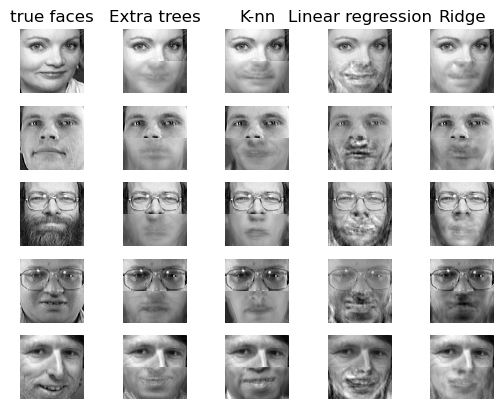

In [118]:

for i in range(n_faces):
    true_face = np.hstack((X_test[i], y_test[i]))

    if i:
        sub = plt.subplot(n_faces, n_cols, i * n_cols + 1)
    else:
        sub = plt.subplot(n_faces, n_cols, i * n_cols + 1, title="true faces")

    sub.axis("off")
    sub.imshow(
        true_face.reshape(image_shape), cmap=plt.cm.gray, interpolation="nearest"
    )

    for j, est in enumerate(sorted(ESTIMATORS)):
        completed_face = np.hstack((X_test[i], y_test_predict[est][i]))

        if i:
            sub = plt.subplot(n_faces, n_cols, i * n_cols + 2 + j)

        else:
            sub = plt.subplot(n_faces, n_cols, i * n_cols + 2 + j, title=est)

        sub.axis("off")
        sub.imshow(
            completed_face.reshape(image_shape),
            cmap=plt.cm.gray,
            interpolation="nearest",
        )

plt.show()

In [6]:
# Global centering (focus on one feature, centering all samples)
# faces_centered = faces - faces.mean(axis=0)

# Local centering (focus on one sample, centering all features)
# faces_centered -= faces_centered.mean(axis=1).reshape(n_samples, -1)

# print("Dataset consists of %d faces" % n_samples)

In [44]:
# Percentage of variance explained for each components
# print(
#     "explained variance ratio (first two components):\n    可解释的差异率 %s" % str(pca.explained_variance_ratio_)
    
# )

explained variance ratio (first two components):
    可解释的差异率 [0.92461872 0.05306648]


In [125]:
# 第二轮训练验证

# Test on a subset of people
n_faces = 10
rng = check_random_state(1)
face_ids = rng.randint(test.shape[0], size=(n_faces,))

In [126]:
face_ids

array([37, 12, 72,  9, 75,  5, 79, 64, 16,  1])

In [127]:
test_round2 = test[face_ids, :]

In [124]:
print("%s %s %s %s %s %s" % (test_round2.shape,test_round2.size,test_round2[0].size,test_round2[0][0].size,type(test_round2),len(test_round2)))

(10, 4096) 40960 4096 1 <class 'numpy.ndarray'> 10


In [128]:
n_pixels = data.shape[1]
# Upper half of the faces
X_train = train[:, : (n_pixels + 1) // 2]
# Lower half of the faces
y_train = train[:, n_pixels // 2 :]
X_test = test_round2[:, : (n_pixels + 1) // 2]
y_test = test_round2[:, n_pixels // 2 :]

In [139]:
# Fit estimators
# ESTIMATORS = {
#     "增强树回归Extra trees": ExtraTreesRegressor(
#         n_estimators=10, max_features=32, random_state=0
#     ),
#     "K近邻回归K-nn": KNeighborsRegressor(),
#     "线性回归Linear regression": LinearRegression(),
#     "岭回归Ridge": RidgeCV(),
# }

ESTIMATORS = {
    "Extra trees": ExtraTreesRegressor(
        n_estimators=10, max_features=32, random_state=0
    ),
    "K-nn": KNeighborsRegressor(),
    "Linear regression": LinearRegression(),
    "Ridge": RidgeCV(),
}

In [140]:
# help(RidgeCV)
y_test_predict = dict()
for name, estimator in ESTIMATORS.items():
    estimator.fit(X_train, y_train)
    y_test_predict[name] = estimator.predict(X_test)

In [146]:
# Plot the completed faces
image_shape = (64, 64)

n_cols = 1 + len(ESTIMATORS)
plt.figure(figsize=(4.0 * n_cols, 4.52 * n_faces))
plt.suptitle("Face completion with multi-output estimators", size=16)


Text(0.5, 0.98, 'Face completion with multi-output estimators')

<Figure size 2000x4520 with 0 Axes>

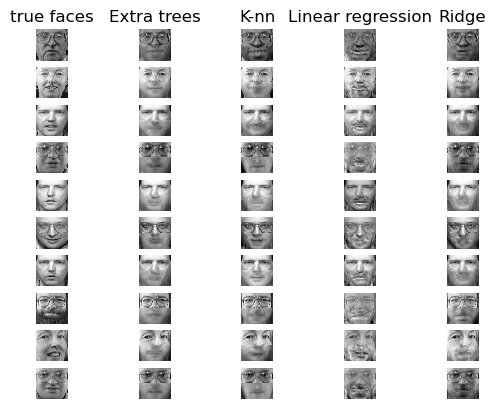

In [147]:
for i in range(n_faces):
    true_face = np.hstack((X_test[i], y_test[i]))

    if i:
        sub = plt.subplot(n_faces, n_cols, i * n_cols + 1)
    else:
        sub = plt.subplot(n_faces, n_cols, i * n_cols + 1, title="true faces")

    sub.axis("off")
    sub.imshow(
        true_face.reshape(image_shape), cmap=plt.cm.gray, interpolation="nearest"
    )

    for j, est in enumerate(sorted(ESTIMATORS)):
        completed_face = np.hstack((X_test[i], y_test_predict[est][i]))

        if i:
            sub = plt.subplot(n_faces, n_cols, i * n_cols + 2 + j)

        else:
            sub = plt.subplot(n_faces, n_cols, i * n_cols + 2 + j, title=est)

        sub.axis("off")
        sub.imshow(
            completed_face.reshape(image_shape),
            cmap=plt.cm.gray,
            interpolation="nearest",
        )

plt.show()